<a href="https://colab.research.google.com/github/jeffhamm/CR-cross-checker/blob/master/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import os

In [7]:
x = tf.constant([[1,2,3], [4,5,6]])

In [8]:
print(x)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


In [12]:
x = tf.ones((5, 2))

In [13]:
print(x)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]], shape=(5, 2), dtype=float32)


In [14]:
y = tf.range(10)
print(y)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


In [15]:
y = tf.cast(x, dtype = tf.float32)

In [16]:
print(y)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]], shape=(5, 2), dtype=float32)


In [18]:
x = tf.random.normal((3,2))
print(x)

tf.Tensor(
[[ 0.35737577  1.838558  ]
 [ 0.5218495  -0.93592846]
 [-1.6657275   0.26915544]], shape=(3, 2), dtype=float32)


In [22]:
x = tf.reshape(x, (2, 3))
print(x)

tf.Tensor(
[[ 0.35737577  1.838558    0.5218495 ]
 [-0.93592846 -1.6657275   0.26915544]], shape=(2, 3), dtype=float32)


In [23]:
x = x.numpy()

In [24]:
x = tf.convert_to_tensor(x)

In [25]:
print(x)

tf.Tensor(
[[ 0.35737577  1.838558    0.5218495 ]
 [-0.93592846 -1.6657275   0.26915544]], shape=(2, 3), dtype=float32)


In [26]:
print(type(x))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [27]:
x = tf.Variable([1,2,3])
print(x)

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>


In [28]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [29]:
mnist = keras.datasets.mnist

In [79]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [80]:
x_train, x_test = x_train/255, x_test/255

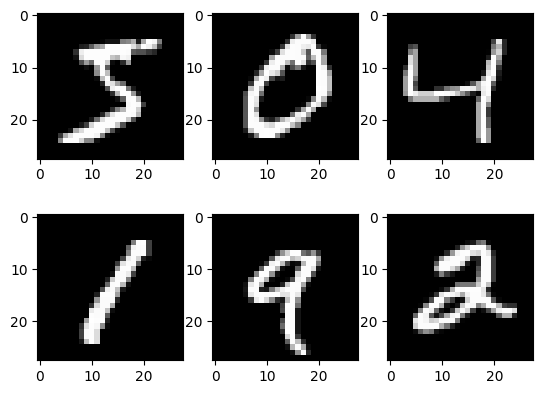

In [62]:
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(x_train[i], cmap = 'gray')

In [69]:
# model
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])

In [70]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [71]:
# Loss and Optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate= 0.001)
metrics = ['accuracy']

In [72]:
model.compile(loss= loss, optimizer= optim, metrics= metrics)
batch_size = 64
epochs = 5

In [81]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle = True)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 13.4397 - accuracy: 0.9093
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 4.8587 - accuracy: 0.9186
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 2.4370 - accuracy: 0.9231
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 1.4871 - accuracy: 0.9274
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 1.0082 - accuracy: 0.9335


In [82]:
#evaluate
model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 2)

157/157 - 0s - loss: 0.9649 - accuracy: 0.9304 - 448ms/epoch - 3ms/step


[0.9648985266685486, 0.930400013923645]

#**Predictions**

In [83]:
probability_model = keras.models.Sequential([
    model,
    keras.layers.Softmax()

])

In [88]:
predictions = probability_model(x_test)
pred0 = predictions[0:5]
print(pred0)


tf.Tensor(
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.18590376e-38
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.99999940e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.99999940e-01 0.00000000e+00
  0.00000000e+00 2.44502301e-22 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.99999940e-01 3.80923426e-09 1.15269653e-17
  0.00000000e+00 8.82015955e-30 1.82447041e-26 4.26372476e-20
  1.45408685e-15 9.92409361e-34]
 [9.99999940e-01 0.00000000e+00 2.72287133e-28 1.11615597e-36
  0.00000000e+00 1.22695984e-24 0.00000000e+00 0.00000000e+00
  2.38049317e-26 1.46019465e-24]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.99999940e-01 0.00000000e+00 0.00000000e+00 4.18022979e-23
  0.00000000e+00 6.32189179e-12]], shape=(5, 10), dtype=float32)


In [90]:
label0 = np.argmax(pred0, axis = 1)
print(label0)

[7 2 1 0 4]


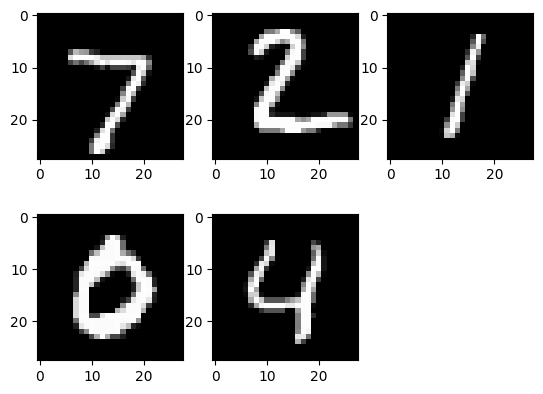

In [92]:
for i in range(5):
  plt.subplot(2,3, i+1)
  plt.imshow(x_test[i], cmap = 'gray')